Rayleigh-Taylor instability
======

This notebook models the Rayleigh-Taylor instability outlined in van Keken *et al.* (1997). 

The system of equations is given by

$$
    \nabla \cdot \left( \eta \nabla \dot\varepsilon \right) - \nabla p = -\rho g \mathbf{\hat z}
$$

$$
    \nabla \cdot \mathbf{v} = 0
$$

**Keywords:** particle swarms, Stokes system, advective diffusive systems

**References**

1. van Keken, P.E., S.D. King, H. Schmeling, U.R. Christensen, D.Neumeister and M.-P. Doin. A comparison of methods for the modeling of thermochemical convection. Journal of Geophysical Research, 102, 22,477-22,495, 1997.  
http://onlinelibrary.wiley.com/doi/10.1029/97JB01353/abstract

![van kekken](./images/vanKekken.gif)

In [1]:
from underworld import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
res = 64
boxLength = 0.9142
boxHeight = 1.0

# light material viscosity / dense material viscosity
viscosityRatio = 1.0 

In [3]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(0., 0.), 
                  maxCoord=(boxLength, boxHeight),
                  gravity=(0., -1.0))

Model.outputDir = "2_15_Rayleigh-Taylor_van_Keken"

In [4]:
import math
import underworld.function as fn

# material perturbation from van Keken et al. 1997
wavelength = 2.0*boxLength
amplitude  = 0.02
offset     = 0.2
k = 2. * math.pi / wavelength

# Create function to return particle's coordinate
coord = fn.coord()

# Define the material perturbation, a function of the x coordinate (accessed by `coord[0]`).
perturbationFn = offset + amplitude*fn.math.cos(k*coord[0])

lightShape = perturbationFn > coord[1] 
densShape = perturbationFn < coord[1]

In [5]:
densMaterial = Model.add_material(name="Dense Material", shape=densShape)
lightMaterial = Model.add_material(name="Light Material", shape=lightShape)

In [6]:
densMaterial.density = 1.0
lightMaterial.density = 0.0

In [7]:
densMaterial.viscosity = 1.0
lightMaterial.viscosity = 1.0


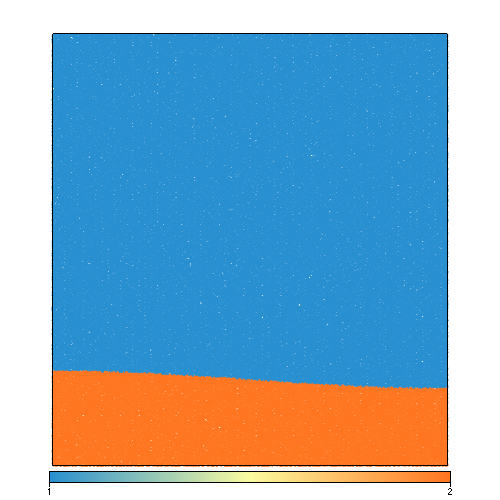

In [8]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.save("Figure_1.png")
Fig.show()

In [9]:
Model.set_velocityBCs(left=[0, None], right=[0., None], top=[0., 0.], bottom=[0.,0.])

In [10]:
Model.init_model()

In [11]:
Model.run_for(nstep=300, checkpoint_interval=10)

Running with UWGeodynamics version 0.9.8b-dev-29e4c3b(development)
Step:     1 Model Time: 17.10 year dt: 17.10 year (2018-11-28 21:06:20)
Step:     2 Model Time: 31.29 year dt: 14.19 year (2018-11-28 21:06:21)
Step:     3 Model Time: 43.54 year dt: 12.25 year (2018-11-28 21:06:22)
Step:     4 Model Time: 54.50 year dt: 10.95 year (2018-11-28 21:06:23)
Step:     5 Model Time: 63.94 year dt: 9.44 year (2018-11-28 21:06:24)
Step:     6 Model Time: 72.51 year dt: 8.57 year (2018-11-28 21:06:25)
Step:     7 Model Time: 80.33 year dt: 7.82 year (2018-11-28 21:06:26)
Step:     8 Model Time: 87.39 year dt: 7.06 year (2018-11-28 21:06:27)
Step:     9 Model Time: 93.79 year dt: 6.41 year (2018-11-28 21:06:28)
Step:    10 Model Time: 99.70 year dt: 5.90 year (2018-11-28 21:06:31)
Step:    11 Model Time: 105.20 year dt: 5.51 year (2018-11-28 21:06:32)
Step:    12 Model Time: 110.14 year dt: 4.94 year (2018-11-28 21:06:34)
Step:    13 Model Time: 114.62 year dt: 4.47 year (2018-11-28 21:06:35)
Ste

Step:   114 Model Time: 231.68 year dt: 0.76 year (2018-11-28 21:08:44)
Step:   115 Model Time: 232.44 year dt: 0.76 year (2018-11-28 21:08:45)
Step:   116 Model Time: 233.20 year dt: 0.76 year (2018-11-28 21:08:46)
Step:   117 Model Time: 233.96 year dt: 0.77 year (2018-11-28 21:08:47)
Step:   118 Model Time: 234.73 year dt: 0.77 year (2018-11-28 21:08:48)
Step:   119 Model Time: 235.51 year dt: 0.77 year (2018-11-28 21:08:49)
Step:   120 Model Time: 236.28 year dt: 0.78 year (2018-11-28 21:08:52)
Step:   121 Model Time: 237.06 year dt: 0.78 year (2018-11-28 21:08:53)
Step:   122 Model Time: 237.85 year dt: 0.78 year (2018-11-28 21:08:54)
Step:   123 Model Time: 238.63 year dt: 0.79 year (2018-11-28 21:08:56)
Step:   124 Model Time: 239.43 year dt: 0.79 year (2018-11-28 21:08:57)
Step:   125 Model Time: 240.22 year dt: 0.80 year (2018-11-28 21:08:58)
Step:   126 Model Time: 241.02 year dt: 0.80 year (2018-11-28 21:08:59)
Step:   127 Model Time: 241.83 year dt: 0.81 year (2018-11-28 21

Step:   228 Model Time: 367.10 year dt: 1.75 year (2018-11-28 21:11:13)
Step:   229 Model Time: 368.87 year dt: 1.77 year (2018-11-28 21:11:14)
Step:   230 Model Time: 370.66 year dt: 1.79 year (2018-11-28 21:11:17)
Step:   231 Model Time: 372.45 year dt: 1.79 year (2018-11-28 21:11:18)
Step:   232 Model Time: 374.26 year dt: 1.81 year (2018-11-28 21:11:20)
Step:   233 Model Time: 376.09 year dt: 1.83 year (2018-11-28 21:11:21)
Step:   234 Model Time: 377.93 year dt: 1.84 year (2018-11-28 21:11:22)
Step:   235 Model Time: 379.77 year dt: 1.84 year (2018-11-28 21:11:23)
Step:   236 Model Time: 381.65 year dt: 1.88 year (2018-11-28 21:11:24)
Step:   237 Model Time: 383.54 year dt: 1.89 year (2018-11-28 21:11:25)
Step:   238 Model Time: 385.44 year dt: 1.89 year (2018-11-28 21:11:26)
Step:   239 Model Time: 387.33 year dt: 1.90 year (2018-11-28 21:11:28)
Step:   240 Model Time: 389.25 year dt: 1.91 year (2018-11-28 21:11:30)
Step:   241 Model Time: 391.18 year dt: 1.93 year (2018-11-28 21

1


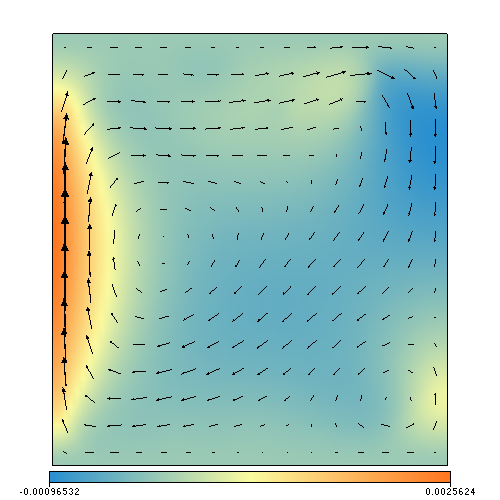

In [12]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Surface(Model.mesh, Model.velocityField[1])
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_2.png")
Fig.show()


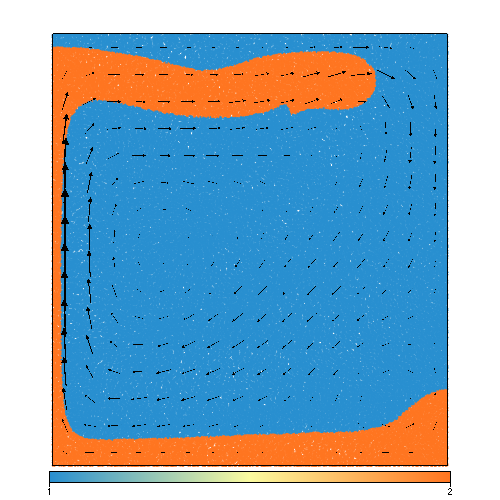

In [13]:
Fig = vis.Figure(figsize=(500, 500))
Fig.Points(Model.swarm, Model.materialField, fn_size=3.0)
Fig.VectorArrows(Model.mesh, Model.velocityField)
Fig.save("Figure_3.png")
Fig.show()